In [1]:
import pandas as pd

In [2]:
drivers = pd.read_csv("../Scraping/f1db_csv/drivers.csv")
lap_times = pd.read_csv("../Scraping/f1db_csv/lap_times.csv")
races = pd.read_csv("../Scraping/f1db_csv/races.csv")

In [3]:
merge1 = pd.merge(lap_times, races, on='raceId')
merge_df = pd.merge(merge1, drivers, on='driverId')

In [4]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        550927 non-null  int64 
 1   driverId      550927 non-null  int64 
 2   lap           550927 non-null  int64 
 3   position      550927 non-null  int64 
 4   time_x        550927 non-null  object
 5   milliseconds  550927 non-null  int64 
 6   year          550927 non-null  int64 
 7   round         550927 non-null  int64 
 8   circuitId     550927 non-null  int64 
 9   name          550927 non-null  object
 10  date          550927 non-null  object
 11  time_y        550927 non-null  object
 12  url_x         550927 non-null  object
 13  fp1_date      550927 non-null  object
 14  fp1_time      550927 non-null  object
 15  fp2_date      550927 non-null  object
 16  fp2_time      550927 non-null  object
 17  fp3_date      550927 non-null  object
 18  fp3_time      550927 non

In [5]:
merge_df.drop(['time_y','code','driverRef','dob','nationality','time_y','url_x','url_y','fp1_date','fp2_date','fp3_date','fp1_time','fp2_time','fp3_time','quali_date','quali_time','sprint_date','sprint_time','driverRef'], axis=1, inplace=True)

In [6]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        550927 non-null  int64 
 1   driverId      550927 non-null  int64 
 2   lap           550927 non-null  int64 
 3   position      550927 non-null  int64 
 4   time_x        550927 non-null  object
 5   milliseconds  550927 non-null  int64 
 6   year          550927 non-null  int64 
 7   round         550927 non-null  int64 
 8   circuitId     550927 non-null  int64 
 9   name          550927 non-null  object
 10  date          550927 non-null  object
 11  number        550927 non-null  object
 12  forename      550927 non-null  object
 13  surname       550927 non-null  object
dtypes: int64(8), object(6)
memory usage: 58.8+ MB


In [7]:
merge_df.rename(columns={'milliseconds':'lap_total_time', 'time_x':'time'}, inplace=True)
merge_df['driver_name'] = merge_df['forename'] + ' ' + merge_df['surname']
merge_df.drop(['forename','surname'], axis=1, inplace=True)

In [8]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550927 entries, 0 to 550926
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   raceId          550927 non-null  int64 
 1   driverId        550927 non-null  int64 
 2   lap             550927 non-null  int64 
 3   position        550927 non-null  int64 
 4   time            550927 non-null  object
 5   lap_total_time  550927 non-null  int64 
 6   year            550927 non-null  int64 
 7   round           550927 non-null  int64 
 8   circuitId       550927 non-null  int64 
 9   name            550927 non-null  object
 10  date            550927 non-null  object
 11  number          550927 non-null  object
 12  driver_name     550927 non-null  object
dtypes: int64(8), object(5)
memory usage: 54.6+ MB


# Data Cleaning


In [9]:
merge_df = merge_df[merge_df['date'] > '2018-01-01']
merge_df

,raceId,driverId,lap,position,time,lap_total_time,year,round,circuitId,name,date,number,driver_name
10723,989,20,58,1,1:28.863,88863,2018,1,1,Australian Grand Prix,2018-03-25,5,Sebastian Vettel
10724,989,20,57,1,1:26.990,86990,2018,1,1,Australian Grand Prix,2018-03-25,5,Sebastian Vettel
10725,989,20,56,1,1:27.236,87236,2018,1,1,Australian Grand Prix,2018-03-25,5,Sebastian Vettel
10726,989,20,55,1,1:26.983,86983,2018,1,1,Australian Grand Prix,2018-03-25,5,Sebastian Vettel
10727,989,20,54,1,1:26.711,86711,2018,1,1,Australian Grand Prix,2018-03-25,5,Sebastian Vettel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550922,1109,857,66,5,1:23.787,83787,2023,11,11,Hungarian Grand Prix,2023-07-23,81,Oscar Piastri
550923,1109,857,67,5,1:24.053,84053,2023,11,11,Hungarian Grand Prix,2023-07-23,81,Oscar Piastri
550924,1109,857,68,5,1:25.152,85152,2023,11,11,Hungarian Grand Prix,2023-07-23,81,Oscar Piastri
550925,1109,857,69,5,1:24.439,84439,2023,11,11,Hungarian Grand Prix,2023-07-23,81,Oscar Piastri


In [10]:
merge_df.to_csv("formula_1.csv", index=False)

# Data Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [12]:
f1_df = pd.read_csv("formula_1.csv")

In [13]:
f1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124294 entries, 0 to 124293
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   raceId          124294 non-null  int64 
 1   driverId        124294 non-null  int64 
 2   lap             124294 non-null  int64 
 3   position        124294 non-null  int64 
 4   time            124294 non-null  object
 5   lap_total_time  124294 non-null  int64 
 6   year            124294 non-null  int64 
 7   round           124294 non-null  int64 
 8   circuitId       124294 non-null  int64 
 9   name            124294 non-null  object
 10  date            124294 non-null  object
 11  number          124294 non-null  int64 
 12  driver_name     124294 non-null  object
dtypes: int64(9), object(4)
memory usage: 12.3+ MB


In [14]:
f1_df.keys()

Index(['raceId', 'driverId', 'lap', 'position', 'time', 'lap_total_time',
       'year', 'round', 'circuitId', 'name', 'date', 'number', 'driver_name'],
      dtype='object')

In [16]:
q1 = f1_df.lap_total_time.quantile(0.25)
q3 = f1_df.lap_total_time.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')

Lower bound: 50202.375
Upper bound: 130833.375


In [17]:
f1_df = f1_df[(f1_df.lap_total_time > lower_bound) & (f1_df.lap_total_time < upper_bound)]

<Axes: >

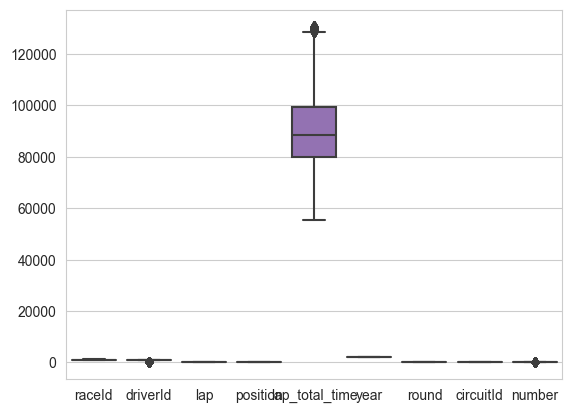

In [18]:
sns.boxplot(data=f1_df)

In [ ]:
# merge pit_stop and